# **Module 1: Introduction to Spatial Data Analysis in Python**

#### Data
In this workshop, we will use 3 datasets from the Minnesota Geospatial Commons, which have been downloaded, cleaned, transformed and saved to the directory `./data-module-1/`.
- `soil_samp_2021-10-05.csv` - Minnesota Six-Inch Soil Temperature: https://gisdata.mn.gov/dataset/geos-soil-temp-network
- `gw_provinces_extra.shp` - Groundwater Provinces of Minnesota 2021: https://gisdata.mn.gov/dataset/geos-groundwater-provinces-mn
- `cdl3_3km.tif` - Cropland Data Layer 2020, Minnesota: https://gisdata.mn.gov/dataset/agri-cropland-data-layer-2020      

#### Software
To execute this code you will need a Python environment with the packages imported below (all required packages are already available on GEMS Informatics Platform).

In [2]:
# general use packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as colors
from matplotlib.colors import from_levels_and_colors

# geospatial packages
import geopandas as gpd
import rasterio
from rasterio.plot import plotting_extent

### **Working with Point Data in Python**

#### Importing XY data

Our first step is to read in the `.csv` file that contains our attribute data with geographic coordinates. For this example, we will be using the *Minnesota Six-Inch Soil Temperature* data. 

> The Minnesota Department of Agriculture (MDA) Six-Inch Soil Temperature Network provides real time soil temperatures at a six-inch depth across Minnesota. The network was established to assist in following best management practices for fall nitrogen fertilizer application.

For today's workshop, temperature on October 5, 2021 has been added for illustrative purposes. We read in `.csv` data using the Python `pandas` package, which enables operations on tabular data (data frames).

In [3]:
soil_samp_df = pd.read_csv("./data-module-1/soil_samp_2021-10-05.csv")
soil_samp_df

FileNotFoundError: [Errno 2] No such file or directory: './data-module-1/soil_samp_2021-10-05.csv'

#### Convert `DataFrame` to `GeoDataFrame`
In this step we use the spatial information from `x` and `y` columns to convert the initial table `DataFrame` into a `GeoDataFrame` to enable spatial operations. Because coordinates are supplied in degrees of latitude and longitude, we need to set World Geodetic System 1984 (`epsg:4326`) as a coordinate system.

In [42]:
soil_samp_gdf = gpd.GeoDataFrame(
    soil_samp_df,
    geometry=gpd.points_from_xy(soil_samp_df.x, soil_samp_df.y),
    crs="epsg:4326")
soil_samp_gdf

source          x          y             name  temp_20211005  \
0     MDA -94.194226  44.200166           Judson      41.792586   
1     MDA -95.428875  44.762221    Granite Falls      49.429966   
2     MDA -93.268405  43.513998     Gordonsville      37.783807   
3     MDA -94.358969  44.877802       Hutchinson      60.243006   
4     MDA -96.306798  44.003185        Pipestone      58.489282   
..    ...        ...        ...              ...            ...   
60  NDAWN -95.601876  46.610477           Perham      37.697912   
61  NDAWN -94.995800  46.820590          Hubbard      48.817212   
62  NDAWN -95.371700  47.012860       Pine Point      37.371797   
63    UMN -93.180000  44.990000  St. Paul Campus      53.012919   
64  NDAWN -92.859839  44.687725         Hastings      62.641173   

                      geometry  
0   POINT (-94.19423 44.20017)  
1   POINT (-95.42888 44.76222)  
2   POINT (-93.26841 43.51400)  
3   POINT (-94.35897 44.87780)  
4   POINT (-96.30680 44.00319)  
..                         ...  
60  POINT (-95.60188 46.61048)  
61  POINT (-94.99580 46.82059)  
62  POINT (-95.37170 47.01286)  
63  POINT (-93.18000 44.99000)  
64  POINT (-92.85984 44.68773)  

[65 rows x 6 columns]

#### Summarize Point Data

In [43]:
soil_samp_gdf.head()

source          x          y           name  temp_20211005  \
0    MDA -94.194226  44.200166         Judson      41.792586   
1    MDA -95.428875  44.762221  Granite Falls      49.429966   
2    MDA -93.268405  43.513998   Gordonsville      37.783807   
3    MDA -94.358969  44.877802     Hutchinson      60.243006   
4    MDA -96.306798  44.003185      Pipestone      58.489282   

                     geometry  
0  POINT (-94.19423 44.20017)  
1  POINT (-95.42888 44.76222)  
2  POINT (-93.26841 43.51400)  
3  POINT (-94.35897 44.87780)  
4  POINT (-96.30680 44.00319)

In [44]:
print ("Extent of the data is defined by the following bounding box: ")
soil_samp_gdf.total_bounds

Extent of the data is defined by the following bounding box: 


array([-97.150283 ,  43.513998 , -91.8002195,  48.883533 ])

In [45]:
print ("The following contains the information on the Coordinate Reference System: ")
soil_samp_gdf.crs

The following contains the information on the Coordinate Reference System: 


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [46]:
soil_samp_gdf.describe()

x          y  temp_20211005
count  65.000000  65.000000      65.000000
mean  -95.116678  45.713764      49.090586
std     1.303074   1.633838       7.735855
min   -97.150283  43.513998      35.182697
25%   -96.132504  44.238686      42.902563
50%   -95.318131  45.594495      49.429966
75%   -94.251400  46.820590      54.892523
max   -91.800219  48.883533      62.641173

In [47]:
soil_samp_gdf.describe(include=[object])

source      name
count      65        65
unique      3        64
top       MDA  Campbell
freq       31         2

#### Vizualize Point Data

<Axes: >

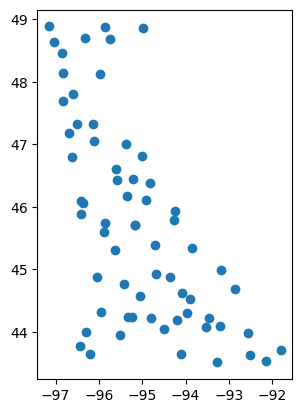

In [48]:
soil_samp_gdf.plot()

**Although a simple plot can be easily produced with Python, it is rarely the final product that allows you to explore and share insights about the data. The examples below provide options to create a interactive map and on how you can better control figure aesthetics and add important functional components, such as legend.**

In [49]:
soil_samp_gdf.explore()

<Axes: >

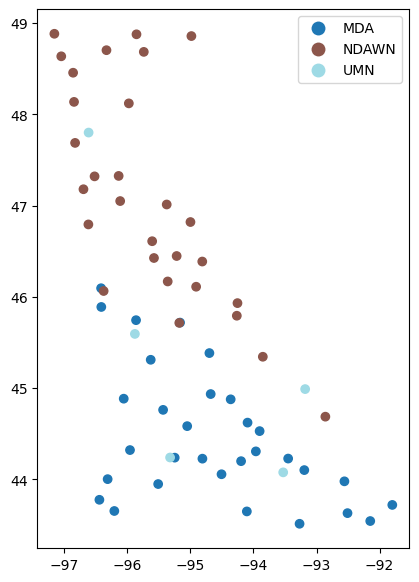

In [50]:
soil_samp_gdf.plot(column="source", legend=True, cmap="tab20",  categorical=True, figsize=(14,7))

**You can find more information on suported colors and colormaps in `matplotlib` by going to the following links:**
- https://matplotlib.org/stable/tutorials/colors/colormaps.html
- https://matplotlib.org/stable/gallery/color/named_colors.html

Text(0.5, 1.0, 'Minnesota Six-Inch Soil Temperature, degrees F')

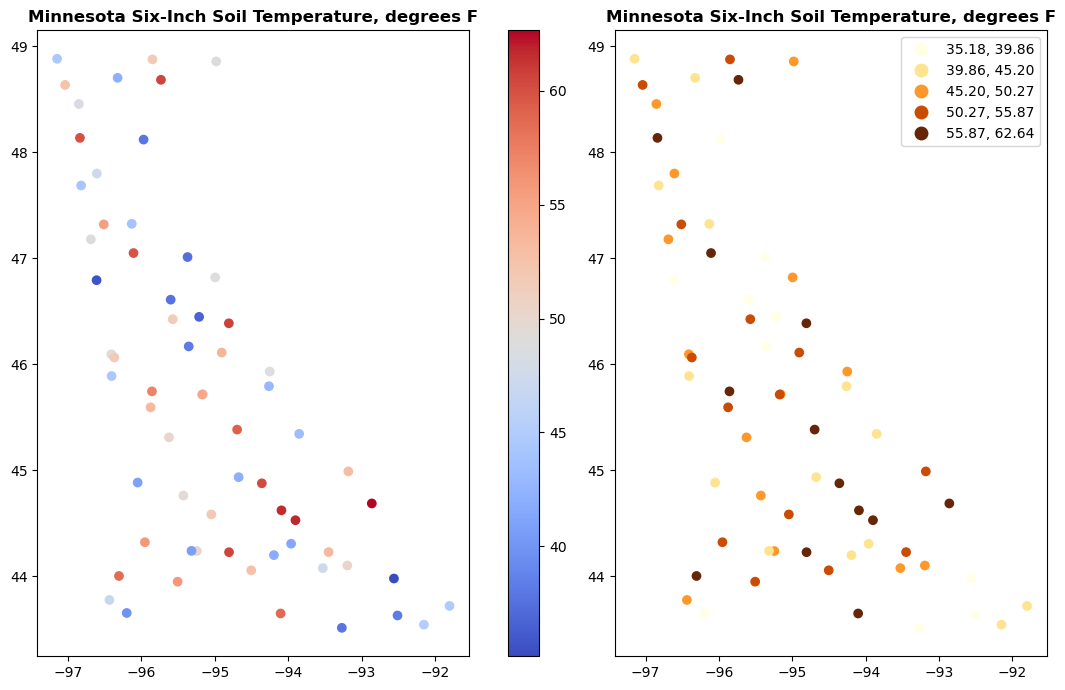

In [51]:
fig, axs = plt.subplots(1,2, figsize=(14,7), tight_layout=True)

soil_samp_gdf.plot(ax=axs[0], column="temp_20211005", legend=True, cmap="coolwarm")
axs[0].set_title("Minnesota Six-Inch Soil Temperature, degrees F", weight="bold")

soil_samp_gdf.plot(ax=axs[1], column="temp_20211005", legend=True, scheme="NaturalBreaks", cmap="YlOrBr") 
axs[1].set_title("Minnesota Six-Inch Soil Temperature, degrees F", weight="bold")

### **Working with Polygon Data in Python**

#### Import Shapefile

Our first step is to read in the `.shp` file that contains our attribute data and geometry data. For this example, we will be using the *Groundwater Provinces of Minnesota 2021* data. 

> The Minnesota Groundwater Provinces data summarizes aquifer and groundwater resource differences at the regional level. Some parts of the state have several groundwater resources to choose from, while other parts of the state may have only limited groundwater resources available.

For today's workshop, 3 random variables have been added as fields for illustrative purposes. We read in vector data using the `geopandas` package directly.

In [52]:
gw_prov_gdf = gpd.read_file("./data-module-1/gw_provinces_extra.shp")

#### Summarize Polygon Data

In [53]:
gw_prov_gdf.head()

PROVINCE    Shape_Leng    Shape_Area var1 var2        var3  \
0        1  1.960325e+06  1.292675e+10    a    g  251.358443   
1        2  1.215290e+06  1.974823e+10    b    d   86.551224   
2        3  7.008053e+04  7.707483e+07    b    g  214.592184   
3        3  6.044617e+04  5.741194e+07    b    g  214.592184   
4        3  4.273664e+04  3.197101e+07    b    g  214.592184   

                                            geometry  
0  POLYGON ((561759.821 5169560.103, 561540.953 5...  
1  POLYGON ((416918.891 4977715.284, 417071.297 4...  
2  POLYGON ((478174.046 4959160.337, 477886.896 4...  
3  POLYGON ((421697.056 4899078.248, 421931.822 4...  
4  POLYGON ((482090.578 4884929.784, 482210.578 4...

In [54]:
print ("Extent of the data is defined by the following bounding box: ")
gw_prov_gdf.total_bounds

Extent of the data is defined by the following bounding box: 


array([ 189775.332 , 4816306.5661,  761655.0734, 5472236.0419])

In [55]:
print ("The following contains the information on the Coordinate Reference System: ")
soil_samp_gdf.crs

The following contains the information on the Coordinate Reference System: 


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [56]:
gw_prov_gdf.describe()

Shape_Leng    Shape_Area        var3
count  4.200000e+01  4.200000e+01   42.000000
mean   3.897428e+05  5.173364e+09  238.415046
std    7.006440e+05  1.390839e+10   40.156490
min    1.867229e+04  1.170450e+07   86.551224
25%    4.893906e+04  5.775640e+07  214.592184
50%    9.085977e+04  1.728164e+08  240.793168
75%    2.168124e+05  9.189316e+08  240.793168
max    2.921535e+06  7.389253e+10  353.440423

In [57]:
gw_prov_gdf.describe(include=[object])

PROVINCE var1 var2
count        42   42   42
unique        6    3    3
top           6    c    e
freq         24   24   26

#### Vizualize Polygon Data

<Axes: >

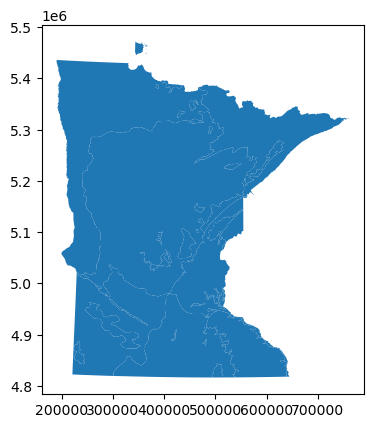

In [58]:
gw_prov_gdf.plot()

In [59]:
gw_prov_gdf.explore()

Text(0.5, 1.0, 'Groundwater Provinces of Minnesota var2')

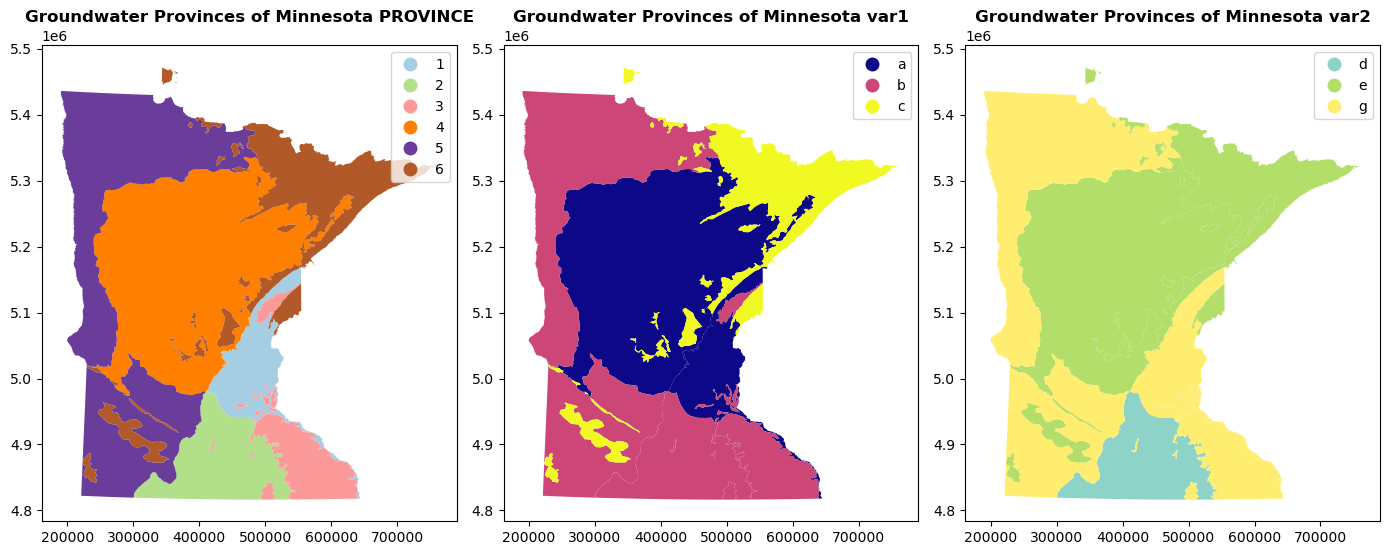

In [60]:
fig, axs = plt.subplots(1,3, figsize=(14,7), tight_layout=True)

gw_prov_gdf.plot(ax=axs[0], column="PROVINCE", legend=True, cmap="Paired")
axs[0].set_title("Groundwater Provinces of Minnesota PROVINCE", weight="bold")

gw_prov_gdf.plot(ax=axs[1], column="var1", legend=True, cmap="plasma")
axs[1].set_title("Groundwater Provinces of Minnesota var1", weight="bold")

gw_prov_gdf.plot(ax=axs[2], column="var2", legend=True, cmap="Set3")
axs[2].set_title("Groundwater Provinces of Minnesota var2", weight="bold")

Text(0.5, 1.0, 'Groundwater Provinces of Minnesota var3')

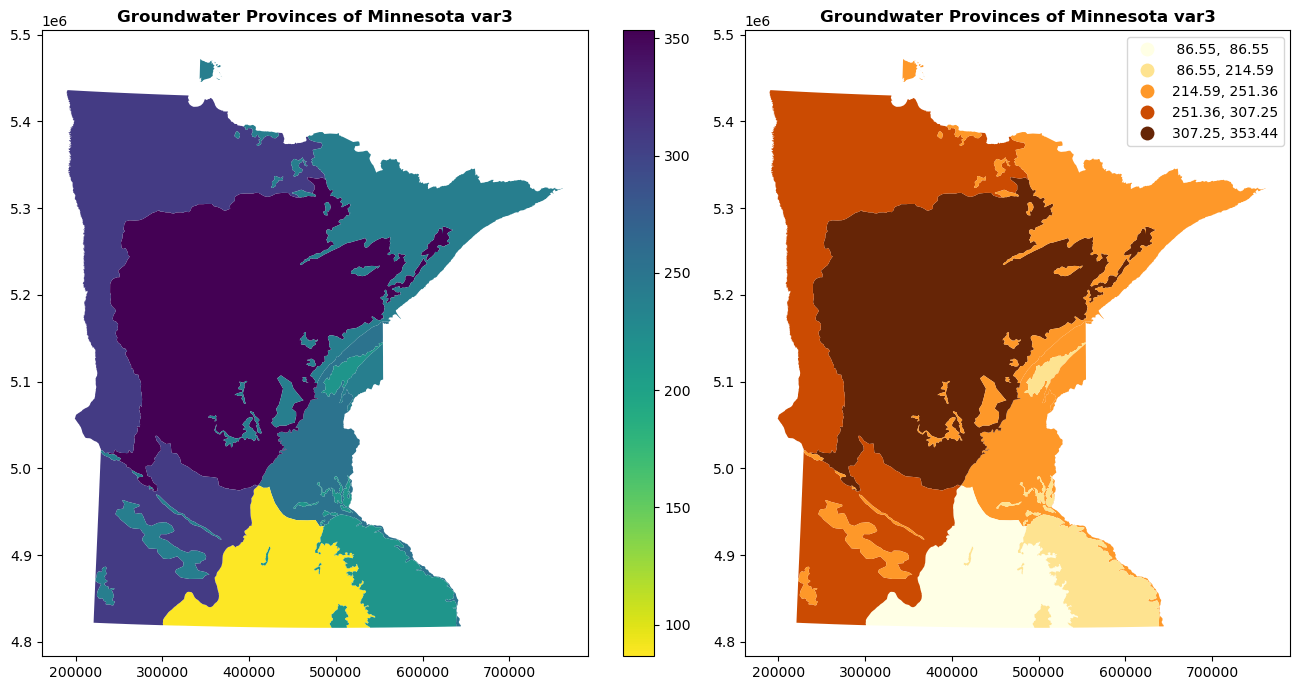

In [61]:
fig, axs = plt.subplots(1,2, figsize=(14,7), tight_layout=True)

gw_prov_gdf.plot(ax=axs[0], column="var3", legend=True, cmap="viridis_r")
axs[0].set_title("Groundwater Provinces of Minnesota var3", weight="bold")

gw_prov_gdf.plot(ax=axs[1], column="var3", legend=True, scheme="NaturalBreaks", cmap="YlOrBr")
axs[1].set_title("Groundwater Provinces of Minnesota var3", weight="bold")

#### Vizualize Polygon Data

Simple polygon map


<Axes: >

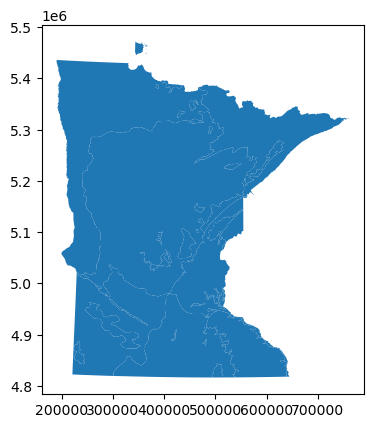

In [62]:
print ("Simple polygon map")
gw_prov_gdf.plot()

In [63]:
print ("Interactive map")
gw_prov_gdf.explore()

Interactive map


Display categorical values on the plot


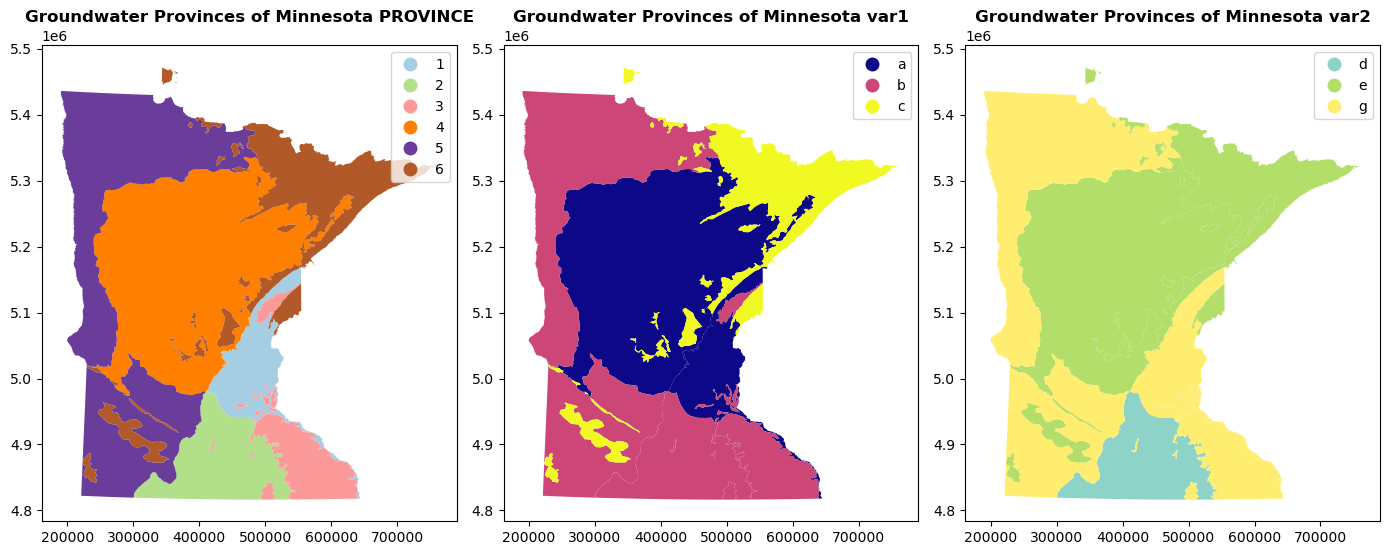

In [64]:
print ("Display categorical values on the plot")
fig, axs = plt.subplots(1,3, figsize=(14,7))
gw_prov_gdf.plot(ax=axs[0], column="PROVINCE", legend=True, cmap="Paired")
axs[0].set_title("Groundwater Provinces of Minnesota PROVINCE", weight="bold")
gw_prov_gdf.plot(ax=axs[1], column="var1", legend=True, cmap="plasma")
axs[1].set_title("Groundwater Provinces of Minnesota var1", weight="bold")
gw_prov_gdf.plot(ax=axs[2], column="var2", legend=True, cmap="Set3")
axs[2].set_title("Groundwater Provinces of Minnesota var2", weight="bold")
plt.tight_layout()

Display continuous values on the plot


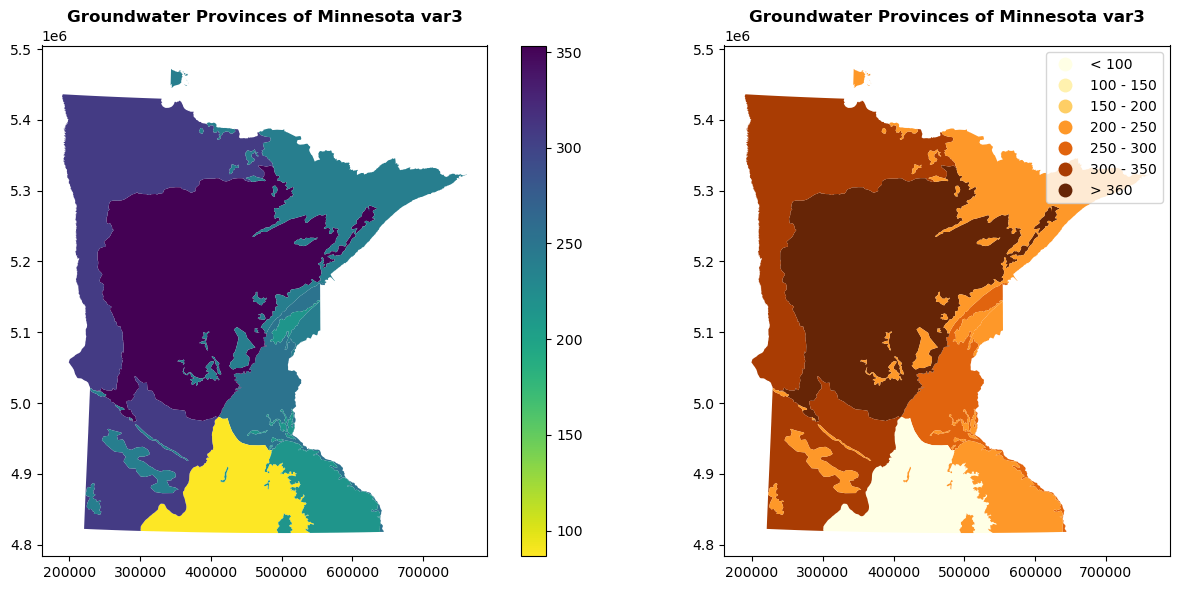

In [65]:
print ("Display continuous values on the plot")
fig, axs = plt.subplots(1,2, figsize=(14,6))
gw_prov_gdf.plot(ax=axs[0], column="var3", legend=True, cmap="viridis_r")
axs[0].set_title("Groundwater Provinces of Minnesota var3", weight="bold")
gw_prov_gdf.plot(ax=axs[1], column="var3", legend=True, scheme="User_Defined", cmap="YlOrBr", 
                 classification_kwds=dict(bins=[100,150,200,250,300,350]),
                 legend_kwds={"labels": ["< 100", "100 - 150", "150 - 200", "200 - 250", 
                                         "250 - 300", "300 - 350", "> 360"]})
axs[1].set_title("Groundwater Provinces of Minnesota var3", weight="bold")
plt.tight_layout()

### **Working with Raster Data in Python**
#### Import Raster Files

Our first step is to read in the raster file that contains our data. For this example, we will be using the *Cropland Data Layer 2020, Minnesota* data. 

> The United States Department of Agriculture (USDA), National Agricultural Statistics Service (NASS) Cropland Data Layer (CDL) is a raster, geo-referenced, crop-specific land cover data layer.

For today's workshop, the data has been transformed to represent 3 categories: corn (`0`), other cropland (`1`), and non cropland (`2`). We read in raster data using the `rasterio` package.

In [66]:
cdl_dataset =  rasterio.open("./data-module-1/cdl3_3km.tif")

#### Summarize raster dataset geoproperties

In [67]:
print ("Number of rows is equal to {}".format(cdl_dataset.height))
print ("Number of columns is equal to {}".format(cdl_dataset.width))
print ("Extent of the dataset: {}".format(cdl_dataset.bounds))
print ("Coordinate Reference System: {}".format(cdl_dataset.crs))
print ("NoData value: {}".format(cdl_dataset.nodata))

Number of rows is equal to 218
Number of columns is equal to 194
Extent of the dataset: BoundingBox(left=-91875.0, bottom=2278515.0, right=490125.0, top=2932515.0)
Coordinate Reference System: EPSG:5070
NoData value: 255.0


#### Summarize raster data values

In [68]:
cdl_array = cdl_dataset.read(1)
print ("Raster unique values are: {}".format(np.unique(cdl_array)))

Raster unique values are: [  0   1   2 255]


In [69]:
cdl_array = cdl_array.astype(float)
cdl_array[cdl_array==cdl_dataset.nodata] = np.nan
print ("Raster unique values are: {}".format(np.unique(cdl_array)))

Raster unique values are: [ 0.  1.  2. nan]


([<matplotlib.axis.XTick at 0x7f825d91be50>,
 [Text(0, 0, 'corn'), Text(1, 0, 'other crops'), Text(2, 0, 'non cropland')])

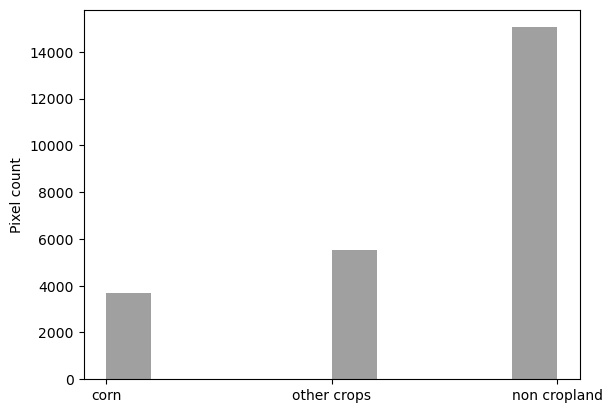

In [70]:
plt.hist(cdl_array.flatten(), facecolor="grey", alpha=0.75)
plt.ylabel("Pixel count")
plt.xticks([0,1,2], labels=["corn", "other crops", "non cropland"])

#### Visualize raster data

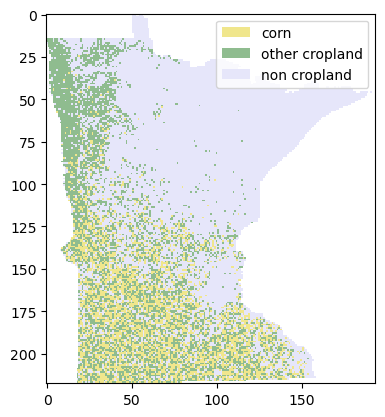

In [71]:
clrs = ["khaki", "darkseagreen", "lavender"]
labels = ["corn", "other cropland", "non cropland"]
cmap, norm = from_levels_and_colors([0,1,2,3], clrs)

plt.imshow(cdl_array, cmap=cmap, norm=norm, interpolation="none")

c = [ mpatches.Patch(facecolor=clrs[i]) for i in range(len(labels))]
plt.legend(c, labels)

#### Summarize raster dataset geoproperties 

In [72]:
print ("Number of rows is equal to {}".format(cdl_dataset.height))
print ("Number of columns is equal to {}".format(cdl_dataset.width))
print ("Extent of the dataset: {}".format(cdl_dataset.bounds))
print ("Coordinate Reference System: {}".format(cdl_dataset.crs))
print ("NoData value: {}".format(cdl_dataset.nodata))

Number of rows is equal to 218
Number of columns is equal to 194
Extent of the dataset: BoundingBox(left=-91875.0, bottom=2278515.0, right=490125.0, top=2932515.0)
Coordinate Reference System: EPSG:5070
NoData value: 255.0


#### Summarize raster data values

In [73]:
cdl_array = cdl_dataset.read(1)
print ("Raster unique values are: {}".format(np.unique(cdl_array)))

Raster unique values are: [  0   1   2 255]


In [74]:
cdl_array = cdl_array.astype(float)
cdl_array[cdl_array==cdl_dataset.nodata] = np.nan
print ("Raster unique values are: {}".format(np.unique(cdl_array)))

Raster unique values are: [ 0.  1.  2. nan]


(0.0, 2.0)

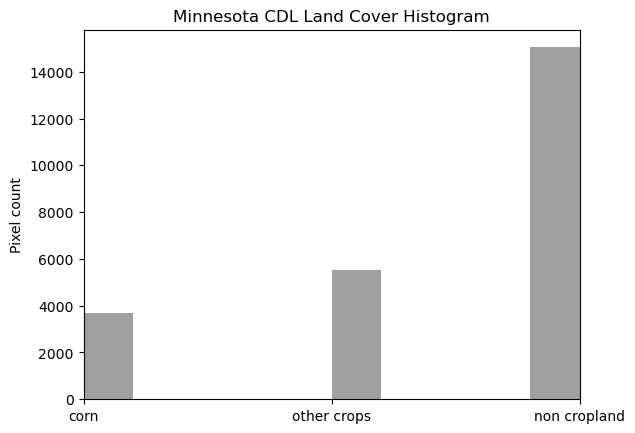

In [75]:
plt.hist(cdl_array.flatten(), facecolor="grey", alpha=0.75)
plt.title("Minnesota CDL Land Cover Histogram")
plt.ylabel("Pixel count")
plt.xticks([0,1,2], labels=["corn", "other crops", "non cropland"])
plt.xlim(0,2)

#### Visualize raster data

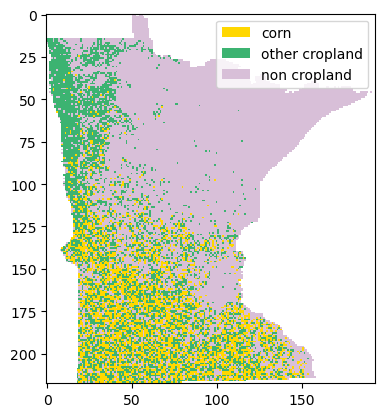

In [76]:
clrs = ["gold", "mediumseagreen", "thistle"]
labels = ["corn", "other cropland", "non cropland"]

cmap, norm = from_levels_and_colors([0,1,2,3], clrs)
plt.imshow(cdl_array, cmap=cmap, norm=norm, interpolation="none")

c = [ mpatches.Patch(facecolor=clrs[i]) for i in range(len(labels))]
plt.legend(c, labels)

### **Layering Features**

#### Display multiple spatial datasets on the same map layout
To understand better landscape patterns, spatial distribution of features and their interactions, it is often useful to display multiple layers on the same map. To ensure that the layers align, follow these rules:
- all layers need to be in the same coordinate system (here we choose the coordinate system of the land cover raster layer);
- axis lables for raster data need to be updated to display a spatial extent of interest instead of the pixel counts.

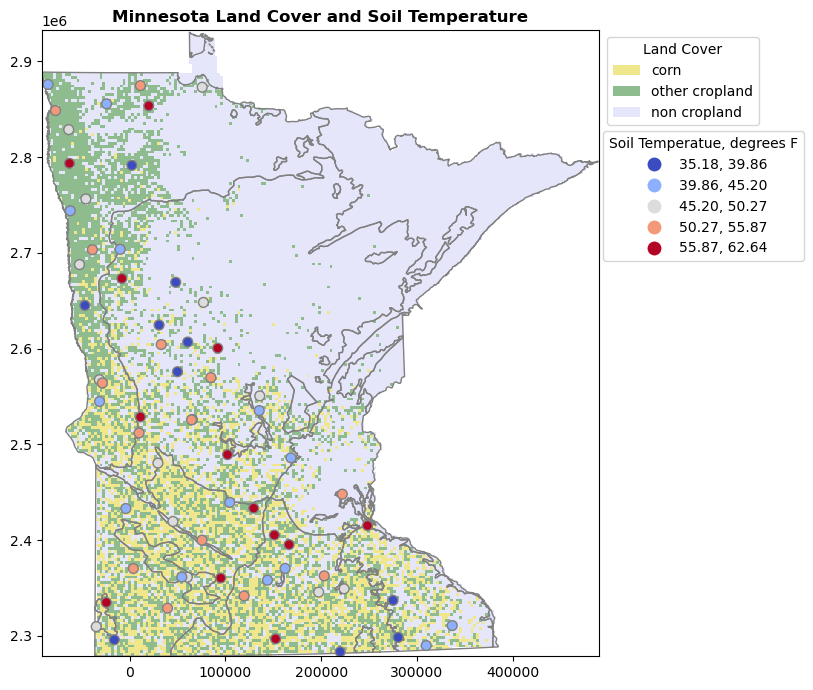

In [77]:
fig, ax = plt.subplots(figsize = (14,7), tight_layout=True)

plot_extent = plotting_extent(cdl_array, cdl_dataset.transform)
clrs = ["khaki", "darkseagreen", "lavender"]
labels = ["corn", "other cropland", "non cropland"]
cmap, norm = from_levels_and_colors([0,1,2,3], clrs)
ax.imshow(cdl_array, cmap=cmap, norm=norm, interpolation="none", extent=plot_extent)
c = [mpatches.Patch(facecolor=clrs[i]) for i in range(len(labels))]
leg1 = plt.legend(c, labels, bbox_to_anchor=(1.3, 1), title="Land Cover")

gw_prov_gdf.to_crs(cdl_dataset.crs).plot(ax=ax, facecolor="none", edgecolor="grey")

soil_samp_gdf.to_crs(cdl_dataset.crs).plot(ax=ax, column="temp_20211005", legend=True, scheme="NaturalBreaks", 
                                           cmap="coolwarm",  edgecolor="grey", markersize=50,
                                           legend_kwds={"bbox_to_anchor":(1.38, 0.85),
                                                        "title":"Soil Temperatue, degrees F"})

plt.title("Minnesota Land Cover and Soil Temperature", weight="bold")
plt.gca().add_artist(leg1)

#### Export final map to a file

In [78]:
fig.savefig("./data-module-1/MN_final_map.jpg", bbox_inches="tight", dpi=150)

### **Exercises**

#### Data
-  `ea_geo.csv` - Malawi Living Standard Measurement Survey Integrated Household Sample (LSMS-IHS) point data are available from https://microdata.worldbank.org/index.php/catalog/3818  
- `mwi_lsms.shp` - Malawi subnational divisions can be downloaded from https://data.humdata.org/dataset/malawi-administrative-level-0-3-boundaries
- `MWI_msk_alt.vrt` - Malawi Digital Elevation Model (DEM) is derived from NASA's Shuttle Radar Topography Mission data product. 

For today's workshop, the data has been downloaded, cleaned, transformed, and saved to the directory `./data-module-1/`.

**Question 1. Read and display the head of the `ea_geo.csv` file stored under `./data-module-1/`.**

**Question 2. Which columns store the geographic coordinates? Transform `DataFrame` into `GeoDataFrame` by using these columns. Display the head of the `GeoDataFrame`.**

**Question 3. Create an interactive map to ensure that the data have been properly geocoded.**

**Question 4. Create a static map with 2 subplots: based on columns `dist_road` and `dist_border`. Display values as continuous.**

**Question 5. Read the `mwi_lsms.shp` shapefile located in the `./data-module-1/` folder. Display the first 2 records of `GeoDataFrame`.**

**Question 6. Explore the characteristics of the `GeoDataFrame`.**  
- How many columns does it have?
- How many rows does it have?
- Calculate summary statistics of the numerical fields.

**Question 7. Create an interactive map of the `GeoDataFrame`.**

**Question 8. Create a static map with 2 subplots: based on columns `croplnd` and `poverty`. Display values as continuous.**

**Question 9. Read the Malawi DEM raster file stored as `MWI_msk_alt.vrt`. Convert the data type to float and reset `NoData` values to `np.nan`.**

**Question 10. Explore the characteristics of your raster.**
- How many rows and columns does it have?
- What is the spatial extent of the dataset?
- What is the coordinate reference system?
- Plot a histogram to display the distribution of values.

**Question 11. Plot Malawi DEM array. Use `terrain` as a `cmap` option.**

**Question 12. Display multiple features on the same map:**
- add Malawi DEM (use the coorditate system from this dataset as a reference for others), use `terrain` as `cmap` option;
- add Malawi district boundaries (polygon), display only the edges with `grey` color;
- add Malawi LSMS points, display `dist_agmrkt` column, include the legend.